In [43]:
import numpy as np
import numba
from numba.types import *
from numba import prange
import matplotlib.pyplot as plt
from numpy.linalg import eig, multi_dot, inv, matrix_power, eigh
from scipy.optimize import curve_fit
from matplotlib import rcParams, cm
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['font.size']=20
from scipy.linalg import expm, sqrtm
from scipy.stats import linregress
from math import acos, factorial
from scipy.special import eval_genlaguerre, gamma, hyp1f1

In [44]:
N=50
beta_min=0
beta_max=5
nbeta=25
b=np.linspace(beta_min, beta_max, nbeta)
Nav=10000

In [45]:
@numba.jit(complex128[:,:](int64, float64), nopython=True, parallel=False, fastmath=True)
def RMT_GUE(N, sigma):
    H=np.zeros((N, N), dtype=complex128)
    for j in range(N):
        H[j,j]=np.random.normal(0,sigma)
        for k in range(j+1, N):
            a=np.random.normal(0,sigma)/np.sqrt(2)
            b=np.random.normal(0,sigma)/np.sqrt(2)
            H[j,k]=complex(a,b)
            H[k,j]=complex(a,-b)
    #auxH=np.random.randn(N, N)+i*np.random.randn(N, N)
    #H=(auxH+auxH.conj().T)/2
    return H

In [46]:
avE=np.zeros((Nav, nbeta))
stdE=np.zeros((Nav, nbeta))
avZ=np.zeros((Nav, nbeta))
minE=np.zeros((Nav, nbeta))
NA_E=np.zeros((Nav, nbeta))
NA_DE=np.zeros((Nav, nbeta))
for k in range(nbeta):
    for j in range(Nav):
        H=RMT_GUE(N,1/np.sqrt(2))
        E,_=eigh(H)
        Z=np.sum(np.exp(-b[k]*E))
        avZ[j,k]=Z
        avE[j,k]=np.sum(E*np.exp(-b[k]*E))
        stdE[j,k]=np.sum((E)**2*np.exp(-b[k]*E))
        minE[j,k]=np.min(E)
        NA_E[j,k]=avE[j,k]/Z
        NA_DE[j,k]=(stdE[j,k]-avE[j,k])/Z
        #avE[j,k]=avE[j,k]-np.min(E)
E_beta=np.average(avE, axis=0)/np.average(avZ, axis=0)
std_beta=np.average(stdE, axis=0)/np.average(avZ, axis=0)-E_beta**2
minE_beta=np.average(minE, axis=0)
NAE=np.average(NA_E, axis=0)
NADE=np.average(NA_DE, axis=0)

In [47]:
E0=-np.sqrt(2*N)
L1=eval_genlaguerre(N-1, 1,-b**2/2)
L2=eval_genlaguerre(N-2, 2,-b**2/2)
L3=eval_genlaguerre(N-3, 3,-b**2/2)
avE=-(b/2+b*L2/L1)
varE=0.5*(1)+L2/L1+b**2*L3/L1-b**2*(L2/L1)**2
#f1=1/(avE-E0)
#f2=1/np.sqrt(varE)
f1=avE
f2=varE

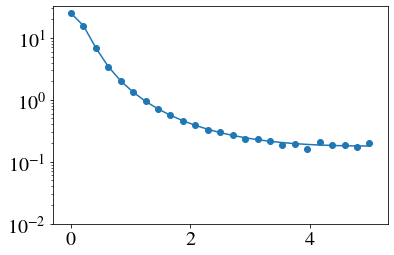

In [48]:
plt.figure()
#plt.plot(b,f1)
plt.plot(b,f2)
#plt.scatter(b, E_beta)
plt.scatter(b, std_beta)
#plt.scatter(b, NADE)
#plt.hlines(-np.sqrt(2*N), 0, 10)
plt.yscale('log')
plt.ylim(1e-2, )
#plt.xscale('log')
#plt.xlim(1e-2,)
plt.show()

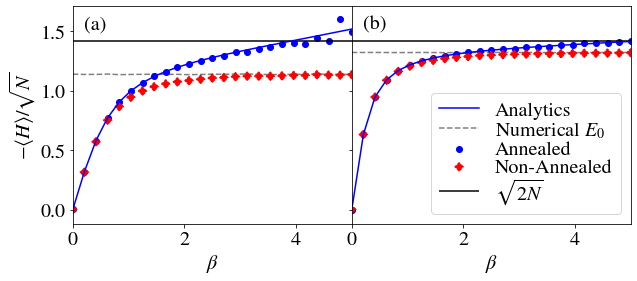

In [62]:
#plt.figure()
fig, (ax1, ax2)=plt.subplots(1, 2, sharey=True, figsize=[10,4])
ax1.plot(b,-fN10/np.sqrt(10), color='blue', label="Analytics")
#plt.plot(b,f2)
ax1.scatter(b, -EN10/np.sqrt(10), color='blue', label="Annealed")
ax1.plot(b, -minEN10/np.sqrt(10), color='grey', zorder=0,ls='--', label="Numerical $E_0$")
ax1.scatter(b, -NAE10/np.sqrt(10), color='red', ls='--', marker='D', label="Non-Annealed")
ax1.hlines(np.sqrt(2*10)/np.sqrt(10), 0, 5, label =r"$\sqrt{2 N}$")
#plt.scatter(b, std_beta)
ax2.plot(b,-f1/np.sqrt(N), color='blue', label="Analytics")
ax2.scatter(b, -E_beta/np.sqrt(N), color='blue', label="Annealed")
ax2.plot(b, -minE_beta/np.sqrt(N), color='grey', zorder=0,ls='--', label="Numerical $E_0$")
ax2.scatter(b, -NAE/np.sqrt(N), color='red', ls='--', marker='D', label="Non-Annealed")
#plt.scatter(b, std_beta)
ax2.hlines(np.sqrt(2*N)/np.sqrt(N), 0, 5, label =r"$\sqrt{2 N}$")
plt.subplots_adjust(wspace=0)
#plt.yscale('log')
#plt.ylim(1, )
#plt.xscale('log')
#plt.xlim(1e-2,)
ax1.set_xlim(0, 5)
ax2.set_xlim(0, 5)
ax1.set_ylabel(r"$-\langle H \rangle/\sqrt{N} $")
ax1.set_xlabel(r"$\beta$")
ax2.set_xlabel(r"$\beta$")
ax1.text(0.2, 1.52, "(a)")
ax2.text(0.2, 1.52, "(b)")
ax2.legend(labelspacing=0)
plt.show()

In [50]:
#uncomment to save the data
"""fN10=f1
EN10=E_beta
minEN10=minE_beta
NAE10=NAE"""

'fN10=f1\nEN10=E_beta\nminEN10=minE_beta\nNAE10=NAE'